In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test  = x_test / 255.0

# Create validation split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
model =keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),


    layers.Conv2D(128, (3,3), activation='relu',padding='same'),
    layers.Conv2D(128, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),   # overfitting control
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
callback = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[callback]
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.5955 - loss: 1.1369
Epoch 1: val_loss improved from inf to 0.93950, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 312s 499ms/step - accuracy: 0.5955 - loss: 1.1368 - val_accuracy: 0.6658 - val_loss: 0.9395
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.6491 - loss: 0.9934
Epoch 2: val_loss improved from 0.93950 to 0.83390, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 310s 497ms/step - accuracy: 0.6491 - loss: 0.9933 - val_accuracy: 0.7030 - val_loss: 0.8339
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.6818 - loss: 0.8956
Epoch 3: val_loss did not improve from 0.83390
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 494ms/step - accuracy: 0.6818 - loss: 0.8956 - val_accuracy: 0.6925 - val_loss: 0.8863
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.7087 - loss: 0.8358
Epoch 4: val_loss improved from 0.83390 to 0.77258, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 494ms/step - accuracy: 0.7087 - loss: 0.8358 - val_accuracy: 0.7302 - val_loss: 0.7726
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7320 - loss: 0.7632
Epoch 5: val_loss improved from 0.77258 to 0.72085, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 310s 496ms/step - accuracy: 0.7320 - loss: 0.7632 - val_accuracy: 0.7522 - val_loss: 0.7208
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.7485 - loss: 0.7199
Epoch 6: val_loss improved from 0.72085 to 0.70700, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 495ms/step - accuracy: 0.7485 - loss: 0.7199 - val_accuracy: 0.7521 - val_loss: 0.7070
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7531 - loss: 0.6952
Epoch 7: val_loss improved from 0.70700 to 0.68484, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 494ms/step - accuracy: 0.7531 - loss: 0.6952 - val_accuracy: 0.7648 - val_loss: 0.6848
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7693 - loss: 0.6587
Epoch 8: val_loss improved from 0.68484 to 0.64337, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 491ms/step - accuracy: 0.7693 - loss: 0.6587 - val_accuracy: 0.7836 - val_loss: 0.6434
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7789 - loss: 0.6315
Epoch 9: val_loss improved from 0.64337 to 0.62564, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 308s 492ms/step - accuracy: 0.7789 - loss: 0.6315 - val_accuracy: 0.7862 - val_loss: 0.6256
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7881 - loss: 0.6000
Epoch 10: val_loss improved from 0.62564 to 0.60365, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 493ms/step - accuracy: 0.7881 - loss: 0.6000 - val_accuracy: 0.7969 - val_loss: 0.6036
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7927 - loss: 0.5907
Epoch 11: val_loss did not improve from 0.60365
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 490ms/step - accuracy: 0.7927 - loss: 0.5907 - val_accuracy: 0.7626 - val_loss: 0.7097
Epoch 12/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8021 - loss: 0.5664
Epoch 12: val_loss did not improve from 0.60365
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 489ms/step - accuracy: 0.8021 - loss: 0.5664 - val_accuracy: 0.7956 - val_loss: 0.6113
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8054 - loss: 0.5450
Epoch 13: val_loss did not improve from 0.60365
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 494ms/step - accuracy: 0.8054 - loss: 0.5451 - val_accuracy: 0.7963 - val_loss: 0.6097
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8099 - loss: 0.5307
Epoch 14: val_lo

625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 490ms/step - accuracy: 0.8206 - loss: 0.5098 - val_accuracy: 0.8033 - val_loss: 0.5899
Epoch 17/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8200 - loss: 0.5036
Epoch 17: val_loss did not improve from 0.58993
625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 495ms/step - accuracy: 0.8200 - loss: 0.5036 - val_accuracy: 0.7934 - val_loss: 0.6235
Epoch 18/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8224 - loss: 0.4963
Epoch 18: val_loss did not improve from 0.58993
625/625 ━━━━━━━━━━━━━━━━━━━━ 318s 489ms/step - accuracy: 0.8224 - loss: 0.4963 - val_accuracy: 0.7981 - val_loss: 0.6115
Epoch 19/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8246 - loss: 0.4947
Epoch 19: val_loss did not improve from 0.58993
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 489ms/step - accuracy: 0.8246 - loss: 0.4947 - val_accuracy: 0.7857 - val_loss: 0.6582
Epoch 20/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8322 - loss: 0.4783
Epoch 20: val_lo

625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 495ms/step - accuracy: 0.8302 - loss: 0.4783 - val_accuracy: 0.8108 - val_loss: 0.5770
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8409 - loss: 0.4520
Epoch 22: val_loss improved from 0.57695 to 0.57203, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 495ms/step - accuracy: 0.8409 - loss: 0.4520 - val_accuracy: 0.8099 - val_loss: 0.5720
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8369 - loss: 0.4560
Epoch 23: val_loss did not improve from 0.57203
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 490ms/step - accuracy: 0.8369 - loss: 0.4560 - val_accuracy: 0.8014 - val_loss: 0.6111
Epoch 24/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.8404 - loss: 0.4517
Epoch 24: val_loss did not improve from 0.57203
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 492ms/step - accuracy: 0.8404 - loss: 0.4517 - val_accuracy: 0.8071 - val_loss: 0.5958
Epoch 25/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.8408 - loss: 0.4502
Epoch 25: val_loss did not improve from 0.57203
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 496ms/step - accuracy: 0.8408 - loss: 0.4502 - val_accuracy: 0.8043 - val_loss: 0.6061
Epoch 26/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8444 - loss: 0.4412
Epoch 26: val_lo

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy : {test_accuracy:.4f}")
print(f"Test Loss     : {test_loss:.4f}")


Test Accuracy : 0.8069
Test Loss     : 0.6228


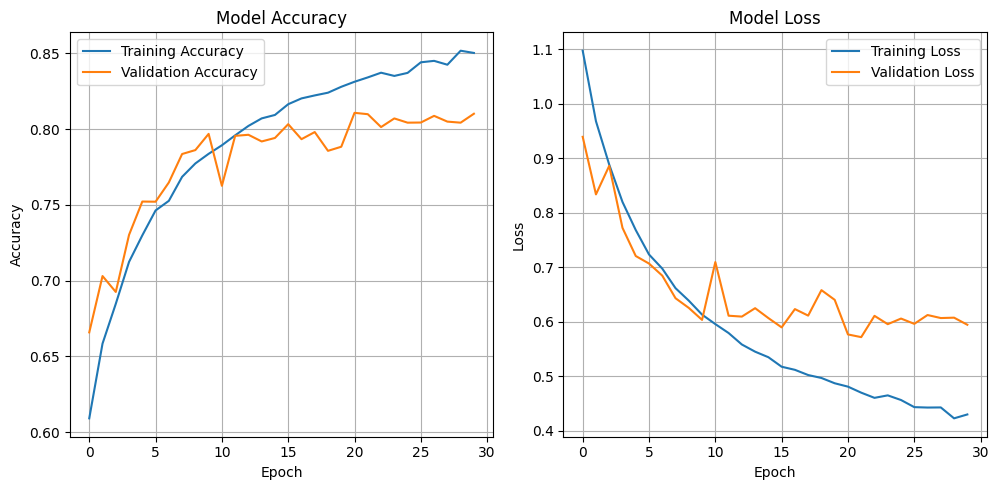

In [10]:

# Plot training history
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
#Results
print(f"\nFinal Results:")
print(f"Training Accuracy: {max(history.history['accuracy']):.4f}")
print(f"Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Loss: {min(history.history['loss']):.4f}")
print(f"Validation Loss: {min(history.history['val_loss']):.4f}")
print(f"Test Loss: {test_loss:.4f}")


Final Results:
Training Accuracy: 0.8518
Validation Accuracy: 0.8108
Test Accuracy: 0.8069
Training Loss: 0.4231
Validation Loss: 0.5720
Test Loss: 0.6228
